<a href="https://colab.research.google.com/github/hiydavid/tfdev_learning/blob/main/ZTM/notebooks/tfdev_03_computer_vision_convolutional_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. Computer Vision and Convolutional Neural Networks

In this notebook we're going to cover:
* Getting a dataset to work with
* Architecture of a convolutional neural network (CNN)
* And end-to-end binary image classification problem
* Steps in modeling with CNNs
* An end-to-end multiclass image classificatoin problem
* Making predicitons on our own custom images

# Get Food101 Data

In [28]:
# load library
import zipfile
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [1]:
# get data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-03-08 07:11:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.76.128, 66.102.1.128, 74.125.133.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.76.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   175MB/s    in 0.6s    

2022-03-08 07:11:36 (175 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [13]:
# see how many files are in the steak and pizza folder
print(len(os.listdir("pizza_steak/train/steak")))
print(len(os.listdir("pizza_steak/train/pizza")))

750
750


In [14]:
# View an image
def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    print(f"Image shape: {img.shape}")
    return img

Image shape: (512, 512, 3)


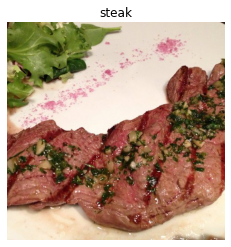

In [15]:
# view an random imag
img = view_random_image(
    target_dir="pizza_steak/train/",
    target_class="steak"
)

Image shape: (384, 512, 3)


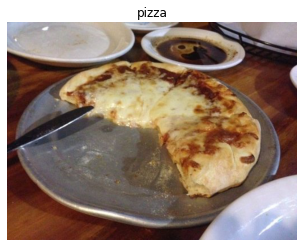

In [25]:
# view an random imag
img = view_random_image(
    target_dir="pizza_steak/train/",
    target_class="pizza"
)

In [26]:
# get tensor's shape
tf.constant(img).shape

TensorShape([384, 512, 3])

# An End-to-End Example

In [29]:
# set seed
tf.random.set_seed(42)

In [30]:
# preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [31]:
# setup path
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

In [32]:
# import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

valid_data = valid_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [34]:
# build a CNN model
model_0 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=10, kernel_size=3, activation='relu', 
        input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_0.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

hist_0 = model_0.fit(
    train_data, 
    epochs=5, 
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 25s 259ms/step - loss: 0.5295 - accuracy: 0.7353 - val_loss: 0.4116 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 11s 235ms/step - loss: 0.4106 - accuracy: 0.8140 - val_loss: 0.4023 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 11s 232ms/step - loss: 0.3892 - accuracy: 0.8307 - val_loss: 0.3478 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 11s 234ms/step - loss: 0.3612 - accuracy: 0.8447 - val_loss: 0.3196 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 11s 238ms/step - loss: 0.3269 - accuracy: 0.8627 - val_loss: 0.3157 - val_accuracy: 0.8700


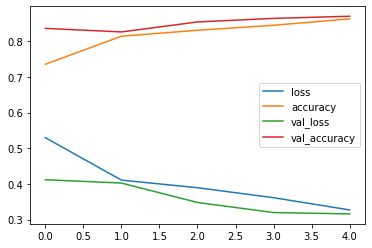

In [37]:
# plot losses
pd.DataFrame(hist_0.history).plot()
plt.show()

In [38]:
# view model
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    